Firstly, we import the required modules for our analysis.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Using pandas, we make a dataframe 'df' to store our data.csv.

The CSV file can be downloaded here : [**Link**](https://drive.google.com/file/d/1yHKY16ZqIbPryy0j2hDxcq_KpGH9qk7y/view?usp=sharing)

In [ ]:
df = pd.read_csv("data.csv")
df.head()

,Time,gdp_val,export
0,1962,7868900.0,254540.0
1,1963,8340590.0,291590.0
2,1964,8962210.0,295510.0
3,1965,8725980.0,316100.0
4,1966,8721160.0,320320.0


Checking if the data types are numerical.

In [ ]:
df.dtypes

Time         int64
gdp_val    float64
export     float64
dtype: object

Checking the various constants of statistical importance for our column time series.

In [ ]:
df.describe()

,Time,gdp_val,export
count,60.000000,6.000000e+01,6.000000e+01
mean,1991.500000,4.471986e+07,7.509185e+06
std,17.464249,4.137964e+07,9.762399e+06
min,1962.000000,7.868900e+06,2.545400e+05
25%,1976.750000,1.346421e+07,7.683850e+05
50%,1991.500000,2.610780e+07,1.762970e+06
75%,2006.250000,6.513783e+07,1.363300e+07
max,2021.000000,1.477168e+08,3.091631e+07


Determining the shape of the data frame.

In [ ]:
df.shape

(60, 3)

Making a function to plot any time series using seaborn.

In [ ]:
def plot_df(df, x, y, title="", xlabel='Year', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

Plotting the values of GDP and Export against time from our dataframe 'df'.

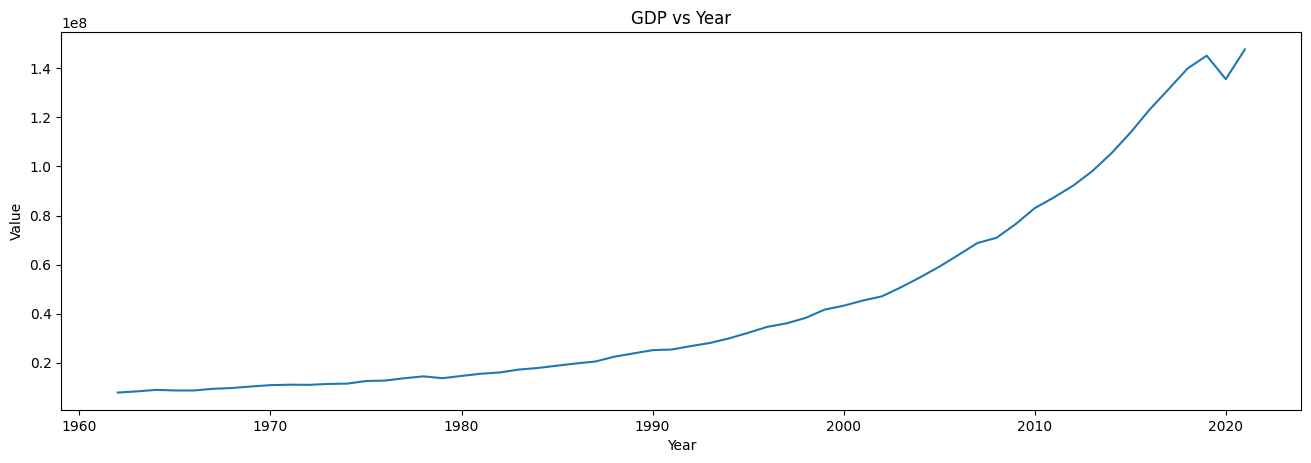

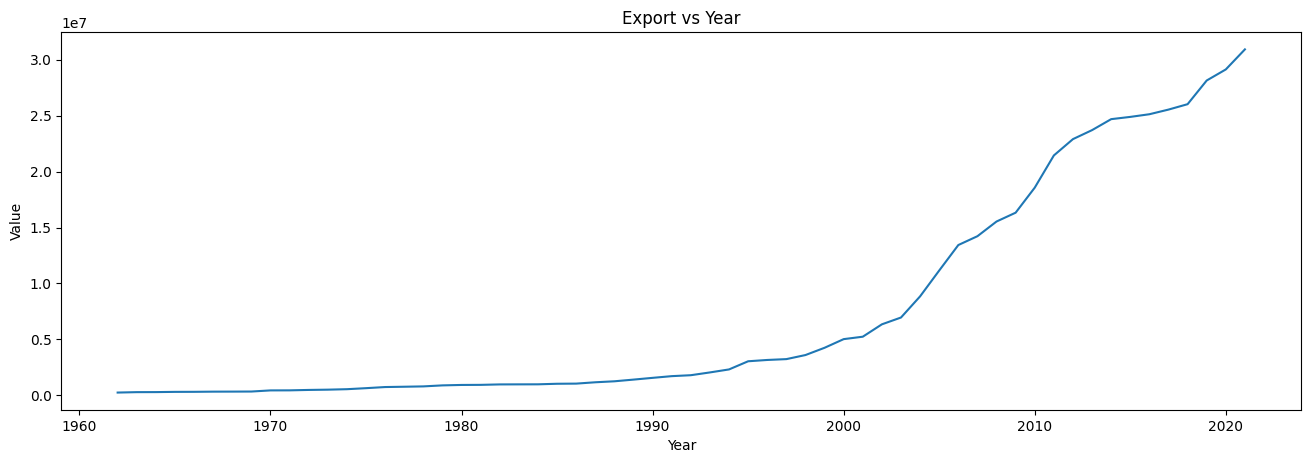

In [ ]:
plot_df(df, x=df.Time, y=df.gdp_val, title='GDP vs Year')
plot_df(df, x=df.Time, y=df.export, title='Export vs Year')

We first conduct Linear Granger Causality Test to check for relation between GDP and Export.

As we are conducting a linear test, we are importing Augmented Dickey-Fuller Test (ADF test) from statsmodels module to conduct a unit root test. This will assure us if the data can be considered stationary. A stationary time series has properties like mean and variance with no dependence on time.

In [ ]:
from statsmodels.tsa.stattools import adfuller

We conduct ADF test on GDP time series. We have the following null hypothesis:
**Null Hypothesis(H0): Series has a unit root and is non-stationary.
Alternative Hypothesis (HA): Series has no unit root and is stationary.**

In [ ]:
result = adfuller(df['gdp_val'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: 3.9569276934406434
p-value: 1.0
critical_values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}
Series is not stationary


p *value* >= 0.05 refers to Null Hypothesis for GDP.

In [ ]:
result = adfuller(df['export'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: 2.1088436344696406
p-value: 0.9987987158445346
critical_values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
Series is not stationary


similarly, p *value* >= 0.05 refers to Null Hypothesis for exports.

To make our data stationary we have to transform our data.
Transformations such as logarithms can help to stabilise the variance of a time series. So we convert the data frame to its natural log values using numpy.

In [ ]:
df['export'] = np.log(df['export'])
df['gdp_val'] = np.log(df['gdp_val'])
df.head()

,Time,gdp_val,export
0,1962,15.878429,12.447213
1,1963,15.936645,12.583104
2,1964,16.008527,12.596458
3,1965,15.981815,12.663814
4,1966,15.981263,12.677076


Plotting the logarithmic values against time.

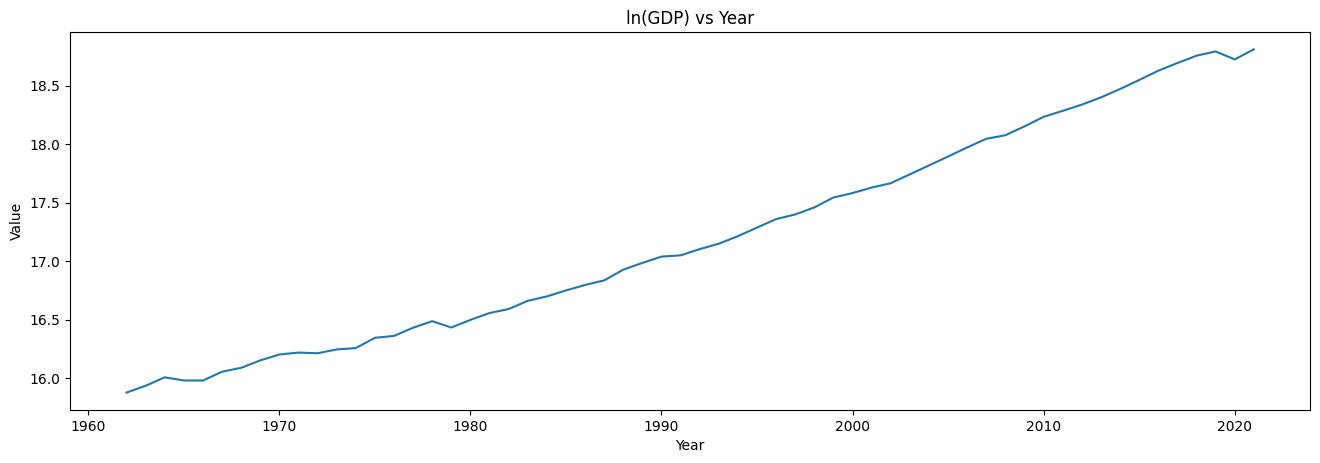

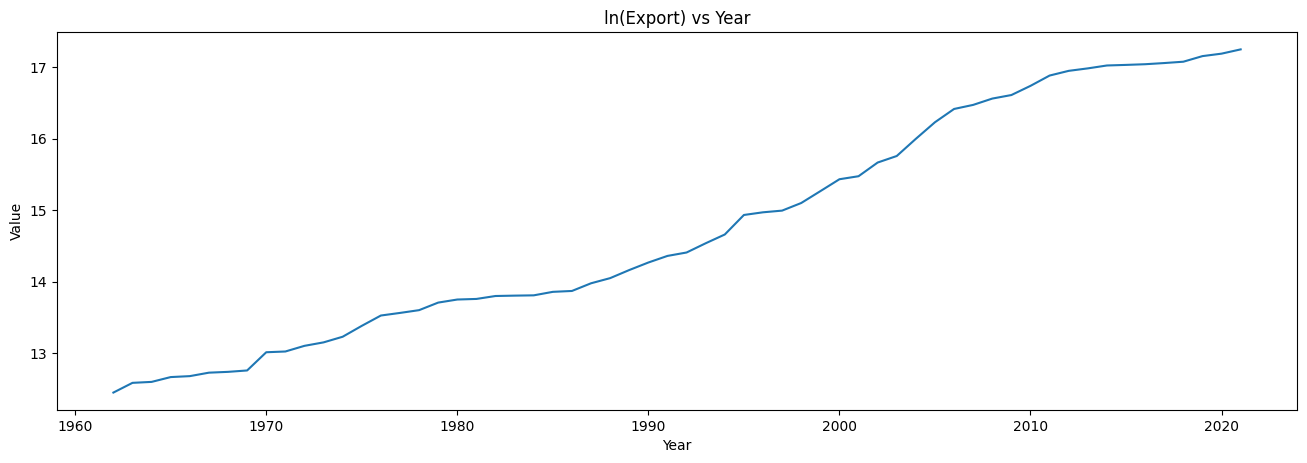

In [ ]:
plot_df(df, x=df.Time, y=df.gdp_val, title='ln(GDP) vs Year')
plot_df(df, x=df.Time, y=df.export, title='ln(Export) vs Year')

We run ADF again and we obtained Null Hypothesis for even the logarithmic data.

Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality. So we use both first order and second order differencing to obtain a stationary time series.

In [ ]:
df['gdp_val_1'] = df['gdp_val'].diff() # first order differencing
df['export_1'] = df['export'].diff() #first order differencing
df['gdp_val_2'] = df['gdp_val'].diff().diff() #second order differencing
df['export_2'] = df['export'].diff().diff() #second order differencing
df.drop([0,1], axis=0, inplace=True)
df.head()


,Time,gdp_val,export,gdp_val_1,export_1,gdp_val_2,export_2
2,1964,16.008527,12.596458,0.071883,0.013354,0.013667,-0.122537
3,1965,15.981815,12.663814,-0.026712,0.067356,-0.098595,0.054002
4,1966,15.981263,12.677076,-0.000553,0.013262,0.026160,-0.054094
5,1967,16.056611,12.725432,0.075348,0.048356,0.075900,0.035094
6,1968,16.089929,12.736760,0.033318,0.011328,-0.042030,-0.037028


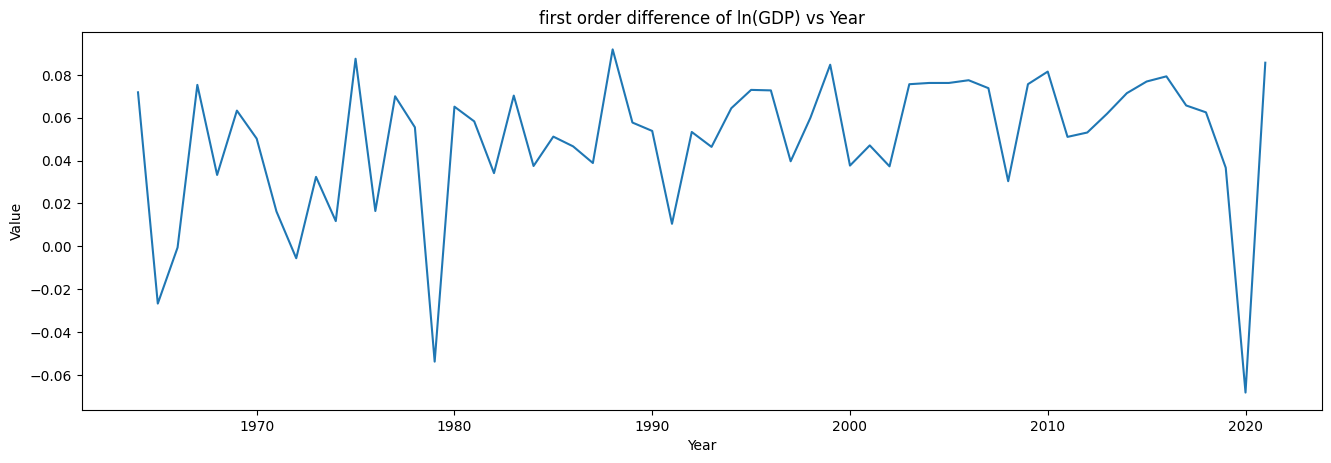

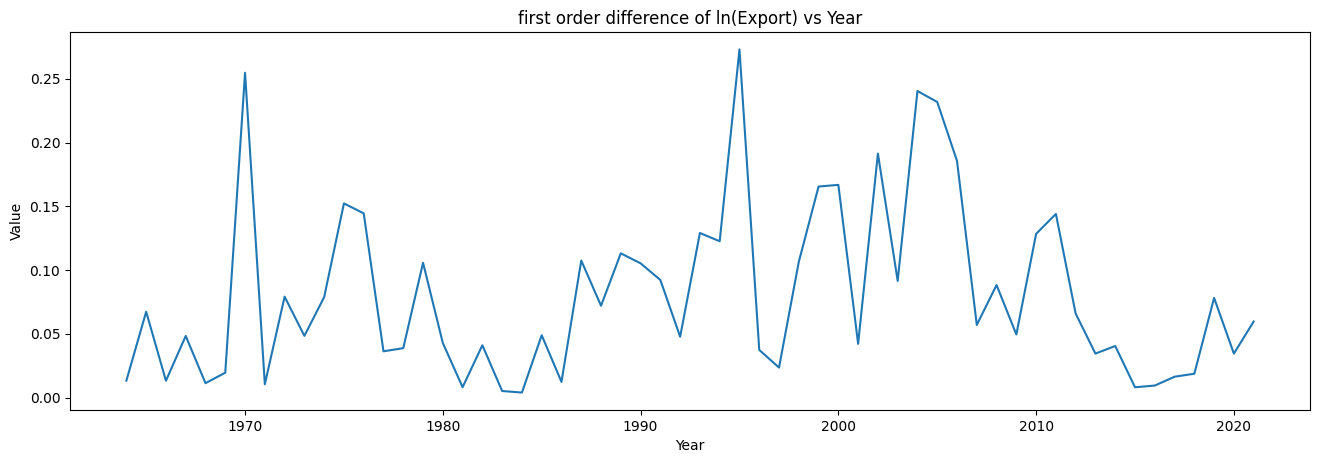

In [ ]:
plot_df(df, x=df.Time, y=df.gdp_val_1, title='first order difference of ln(GDP) vs Year')
plot_df(df, x=df.Time, y=df.export_1, title='first order difference of ln(Export) vs Year')

First running the unit root test (ADF) on first order difference of ln(GDP)

In [ ]:
result = adfuller(df['gdp_val_1'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -7.4131991590512545
p-value: 7.045314819991458e-11
critical_values: {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}
Series is stationary


**p = 7.045314819991458e-11 < 0.05** Hence we obtained a stationary series so we don't need to use second order difference viz. gdp_val_2 and gdp_val_1 will suffice for our test. We conduct the same for first order difference of ln(export).

> Indented block



In [ ]:
result = adfuller(df['export_1'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -5.687557808231139
p-value: 8.212385805981427e-07
critical_values: {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}
Series is stationary


**p-value: 8.212385805981427e-07** which is also less than 0.05 so we have a stationary time series for export. So export_1 will suffice too.

Now we can run linear granger test for our stationary time series.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

Lets have a max lag of 4 and try obtain the p values for each lag. First we test granger causality from export to GDP.

In [ ]:
grangercausalitytests(df[['export_1', 'gdp_val_1']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7096  , p=0.1056  , df_denom=54, df_num=1
ssr based chi2 test:   chi2=2.8602  , p=0.0908  , df=1
likelihood ratio test: chi2=2.7907  , p=0.0948  , df=1
parameter F test:         F=2.7096  , p=0.1056  , df_denom=54, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5147  , p=0.2296  , df_denom=51, df_num=2
ssr based chi2 test:   chi2=3.3263  , p=0.1895  , df=2
likelihood ratio test: chi2=3.2313  , p=0.1988  , df=2
parameter F test:         F=1.5147  , p=0.2296  , df_denom=51, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7727  , p=0.5150  , df_denom=48, df_num=3
ssr based chi2 test:   chi2=2.6562  , p=0.4477  , df=3
likelihood ratio test: chi2=2.5941  , p=0.4585  , df=3
parameter F test:         F=0.7727  , p=0.5150  , df_denom=48, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8569  , p=0.4971  , df_d

{1: ({'lrtest': (2.7907217297575357, 0.09481151688690515, 1),
   'params_ftest': (2.7096322303186557, 0.10555265170764375, 54.0, 1.0),
   'ssr_chi2test': (2.860167354225261, 0.09079805139538695, 1),
   'ssr_ftest': (2.709632230318668, 0.10555265170764204, 54.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (3.231276287448793, 0.19876379009589062, 2),
   'params_ftest': (1.5146635881958246, 0.22960731896151196, 51.0, 2.0),
   'ssr_chi2test': (3.326320036822228, 0.18953908576150663, 2),
   'ssr_ftest': (1.514663588195836, 0.22960731896150852, 51.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (2.5940610621072437, 0.45853167082501944, 3),
   'params_ftest': (0.7727151651931586, 0.5149784510621189, 48.0, 3.0),
   'ssr_chi2test': (2.656208380351503, 0.44772058985968133, 3),
   'ssr_ftest': (0.7727151651931645, 0.5149784510621169, 48.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

As we can see, minimum p value for 1 lag is almost near to 0.05 i.e. 0.09 but still we will have to accept the null hypothesis.
Null Hypothesis (H0) : Export do not granger cause GDP.

Alternative Hypothesis (HA) : Export granger cause GDP.

Trying to establish granger causality from GDP to Export.

In [ ]:
grangercausalitytests(df[['gdp_val_1','export_1' ]], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6508  , p=0.2043  , df_denom=54, df_num=1
ssr based chi2 test:   chi2=1.7425  , p=0.1868  , df=1
likelihood ratio test: chi2=1.7164  , p=0.1902  , df=1
parameter F test:         F=1.6508  , p=0.2043  , df_denom=54, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5366  , p=0.5880  , df_denom=51, df_num=2
ssr based chi2 test:   chi2=1.1784  , p=0.5548  , df=2
likelihood ratio test: chi2=1.1662  , p=0.5582  , df=2
parameter F test:         F=0.5366  , p=0.5880  , df_denom=51, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4307  , p=0.7319  , df_denom=48, df_num=3
ssr based chi2 test:   chi2=1.4805  , p=0.6868  , df=3
likelihood ratio test: chi2=1.4609  , p=0.6913  , df=3
parameter F test:         F=0.4307  , p=0.7319  , df_denom=48, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5713  , p=0.6848  , df_d

{1: ({'lrtest': (1.7163646630141898, 0.1901616659691503, 1),
   'params_ftest': (1.6507584922617826, 0.2043397780911492, 54.0, 1.0),
   'ssr_chi2test': (1.74246729738741, 0.18682650728293376, 1),
   'ssr_ftest': (1.6507584922617569, 0.2043397780911503, 54.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (1.1661595136281449, 0.5581766683225764, 2),
   'params_ftest': (0.5365866883815836, 0.5880054489284215, 51.0, 2.0),
   'ssr_chi2test': (1.1783864529164294, 0.5547746817710995, 2),
   'ssr_ftest': (0.5365866883815884, 0.5880054489284182, 51.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (1.4609477207864643, 0.6913124539532838, 3),
   'params_ftest': (0.4306978958811096, 0.7319496482951124, 48.0, 3.0),
   'ssr_chi2test': (1.4805240170913012, 0.6867726167838566, 3),
   'ssr_ftest': (0.43069789588110585, 0.7319496482951163, 48.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.

We again obtain a null hypothesis.

We see that Linear Granger doesn't give us any relationship and we had to settle for Null Hypothesis. So we tried to look for non linear methods to try establish a relationship as linear methods have some drawbacks.

We chose the diks panchenko test (non-Linear bivariate) test to try obtain a relationship. We obtained the following results using this Non-parametric granger test.

In [ ]:
import math
#DIKS AND PANCHENKO TEST
def redun(x, y, N, m, mmax, epsilon): #returns T2 statistics
  mu= 2.0*epsilon**(m+2*mmax+1)
  h = [0] * N
  Cy = [0] * N
  Cxy = [0] * N
  Cyz = [0] * N
  Cxyz =[0] * N
  T2=0.0
  for i in range(mmax,N):
    Cy[i]=Cxy[i]=Cyz[i]=Cxyz[i]=0.0
    for j in range(mmax,N):
      if(j!=i):
        disx = disy = 0.0
        for s in range(1,m+1):
          disx = max(abs(x[i-s]-x[j-s]),disx)
        for s in range(1,mmax+1):
          disy = max(abs(y[i-s]-y[j-s]),disy)
        if (disy <= epsilon):
          Cy[i] += 1
          if (disx <= epsilon):
            Cxy[i]+= 1
          disz = max(abs(y[i]-y[j]),disy)
          if (disz <= epsilon):

            Cyz[i]+=1
            if (disx <= epsilon):
              Cxyz[i]+=1
    Cy[i] /= (N-mmax)
    Cxy[i] /= (N-mmax)
    Cyz[i] /= (N-mmax)
    Cxyz[i] /= (N-mmax)
    h[i] += 2.0/(mu*(Cxyz[i]*Cy[i] - Cxy[i]*Cyz[i])/6.0)
  for i in range(mmax,N):
    for j in range(mmax,N):
      if (j!=i):
        IYij = IXYij = IYZij = IXYZij = 0
        disx = disy = 0.0
        for s in range(1,m+1):
          disx = max(abs(x[i-s]-x[j-s]),disx)
        for s in range(1,mmax+1):
          disy = max(abs(y[i-s]-y[j-s]),disy)
        if (disy <= epsilon):
          IYij=1
          if (disx <= epsilon):
            IXYij = 1
          disz = max(abs(y[i]-y[j]),disy)
          if (disz <= epsilon):
            IYZij = 1
            if (disx <= epsilon):
              IXYZij = 1

      h[i] += 2.0/(mu*(Cxyz[j]*IYij + IXYZij*Cy[j] - Cxy[j]*IYZij - IXYij*Cyz[j])/(6*(N-mmax)))
  for i in range(mmax,N):
    T2 += h[i]
  T2 /= (N-mmax)
  for i in range(mmax,N):
     h[i] -= T2
  return T2
def uniform(X, M): #to make unit variance
  I = X.sort()
  for i in range(0,M):
    X[i] = I[i]/M*3.464101615
  return X
def normalise(x, N): #normalize the time series to unit std. dev.
  mean=0.0
  var=0.0
  for i in range(0,N):
    mean += x[i]
    var += x[i]*x[i]
  mean /= (N)
  var /= (N)
  var -= mean*mean
  for i in range(0,N):
    x[i] = (x[i]-mean)/math.sqrt(var)
  return x
x = [] #first series
y = [] #second series
m = 5 #embedded dimension
epsilon = 1.66 #epsilon should be more than 1.5
N = len(x)
h = []
ohm = []
cov = []
K = int(N**0.25)
#x = normalise(x,N)
#y = normalise(y,N)
T2 = redun(x,y,N,m,m,epsilon) #redun(x,y, ..) test statistic for X -> Y
ohm[0] = 1.0
for k in range(1,K):
  ohm[k] = 2.0*(1.0-k/(K))
for k in range(0,K): #determine autocovariance of h[i]
  cov[k] = 0.0
  for i in range(m+k,N):
    cov[k] += h[i]*h[i-k]
  cov[k] /= (N-m-k)
T2_TVAL=VT2=0.0 #variance of T2
for k in range(0,K):
  VT2 += 9.0*ohm[k]*cov[k]
T2_TVAL = T2*math.sqrt(N-m)/math.sqrt(VT2)
p_T2 = 0.5 - .5*math.erf(T2_TVAL/math.sqrt(2.0))
T2 = redun(y,x,N,m,m,epsilon)
ohm[0] = 1.0
for k in range(1,K):
  ohm[k] = 2.0*(1.0-k/(K))
for k in range(1,K):
  cov[k] = 0.0
  for i in range(m+k,N):
    cov[k] += h[i]*h[i-k]
  cov[k] /= (N-m-k)
T2_TVAL=VT2=0.0
for k in range(0,K):
  VT2 += 9.0*ohm[k]*cov[k]
T2_TVAL = T2*math.sqrt(N-m)/math.sqrt(VT2)
p_T2 = 0.5 - .5*math.erf(T2_TVAL/math.sqrt(2.0))

IndexError: ignored

Series length=60, embedding dimension=5, bandwidth=1.660000

Null hypothesis: export does not cause GDP
T statistics=2.227, p-value=0.01296

Null hypothesis: GDP does not cause export
T statistics=-0.836, p-value=0.79843

Here we used embedding dimension = max lag + 1 as 5 to have a constant max lag value. For the epsilon, we chose a value of more than 1.5.

We can reject the null hypothesis for p value < 0.05 so we can infer a unidirectional causality from export to GDP but not vice versa.